_NAME: __TODO: FULLNAME__

# Machine Learning Practice - Asynchronous
## Homework 12: Hard Regression Problem


### Task
For this assignment you will be exploring the use of different data preprocessing techniques to solve a hard regression problem.  
* Create a pipeline that includes one or more data pre-processing steps that you have learned about over the course of the semester, followed by a LinearRegression object.
* Use GridSearchCV to:
   * identify the best set of hyperparameters for your pre-processing steps, and
   * compare your different pipeline implementations.
* Once you have chosen a single pipeline model and the corresponding hyperparameters, measure the performance of your model with respect to the test set by reporting RMSE.

### Hints
* Start with just a LinearRegression model & see how it works
* At least one of the dimensionality reduction methods that you have been studying over the last couple of weeks will be helpful
* Feel free to use some of the tools that you have created over the last few homework assignments
* Expect to play with some different ideas
* We are expecting a very small RMSE

### Instructions
* Read the code below 
* Note that there are several provided py files that are imported in the next cells
* For any cell that is flagged as *TODO*, complete the code according to the specifications
* Execute each cell and verify that it is showing correct results
* Hand-In Procedure
  + Make sure that your notebook has been saved
  + Download this file to your local machine (extension: .ipynb)
  + Submit to the Gradscope Notebook HW12 dropbox
  + Check that your submitted file is the correct one
    
### General References
* [Guide to Jupyter](https://www.datacamp.com/community/tutorials/tutorial-jupyter-notebook)
* [Python Built-in Functions](https://docs.python.org/3/library/functions.html)
* [Python Data Structures](https://docs.python.org/3/tutorial/datastructures.html)
* [Numpy Reference](https://docs.scipy.org/doc/numpy/reference/index.html)
* [Numpy Cheat Sheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Numpy_Python_Cheat_Sheet.pdf)
* [Summary of matplotlib](https://matplotlib.org/3.1.1/api/pyplot_summary.html)
* [DataCamp: Matplotlib](https://www.datacamp.com/community/tutorials/matplotlib-tutorial-python?utm_source=adwords_ppc&utm_campaignid=1565261270&utm_adgroupid=67750485268&utm_device=c&utm_keyword=&utm_matchtype=b&utm_network=g&utm_adpostion=1t1&utm_creative=332661264365&utm_targetid=aud-299261629574:dsa-473406587955&utm_loc_interest_ms=&utm_loc_physical_ms=9026223&gclid=CjwKCAjw_uDsBRAMEiwAaFiHa8xhgCsO9wVcuZPGjAyVGTitb_-fxYtkBLkQ4E_GjSCZFVCqYCGkphoCjucQAvD_BwE)
* [Pandas DataFrames](https://urldefense.proofpoint.com/v2/url?u=https-3A__pandas.pydata.org_pandas-2Ddocs_stable_reference_api_pandas.DataFrame.html&d=DwMD-g&c=qKdtBuuu6dQK9MsRUVJ2DPXW6oayO8fu4TfEHS8sGNk&r=9ngmsG8rSmDSS-O0b_V0gP-nN_33Vr52qbY3KXuDY5k&m=mcOOc8D0knaNNmmnTEo_F_WmT4j6_nUSL_yoPmGlLWQ&s=h7hQjqucR7tZyfZXxnoy3iitIr32YlrqiFyPATkW3lw&e=)
* [Sci-kit Learn Linear Models](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model)
* [Sci-kit Learn Ensemble Models](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble)
* [Sci-kit Learn Metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics)
* [Sci-kit Learn Model Selection](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection)
* [Sci-kit Learn Pipelines](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html)
* [Sci-kit Learn Preprocessing](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing)


In [3]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import sys

import pandas as pd
import numpy as np
#import seaborn as sns
import scipy.stats as stats
import os, re, fnmatch
import pathlib, itertools
import time as timelib
import matplotlib.pyplot as plt
import matplotlib.patheffects as peffects
import pickle 

from matplotlib import cm
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import explained_variance_score, confusion_matrix
from sklearn.metrics import mean_squared_error, roc_curve, auc, f1_score
#from sklearn.externals import joblib
from sklearn.manifold import Isomap

##############
# Default figure parameters
plt.rcParams['figure.figsize'] = (6,5)
plt.rcParams['font.size'] = 10
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['figure.constrained_layout.use'] = False
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12

plt.style.use('ggplot')

## Load Data

* Only use training data for training and validation
* Testing data should only be used after model selection (see below)
* Extract, but *do not* use the ttrain/ttest variables except for visualization (again, see below)

In [4]:
""" PROVIDED

data file

"""
# Select file to load
fname = 'hw12_dataset.pkl'
# Load the data and extract the training and testing data
with open(fname, 'rb') as file:
    data = pickle.load(file)

# Displaying the keys or structure of the loaded data
data.keys() if isinstance(data, dict) else type(data)

dict_keys(['Xtrain', 'ytrain', 'Xtest', 'ytest', 'ttrain', 'ttest', 'description', 'author', 'email'])

In [5]:
# Load the dat and extract the training and testing data

# TODO
Xtrain = data['Xtrain']
ytrain = data['ytrain']
Xtest = data['Xtest']
ytest = data['ytest']

# Displaying basic information about each component
train_test_info = {
    "Xtrain": {"Type": type(Xtrain), "Shape": Xtrain.shape},
    "ytrain": {"Type": type(ytrain), "Shape": ytrain.shape},
    "Xtest": {"Type": type(Xtest), "Shape": Xtest.shape},
    "ytest": {"Type": type(ytest), "Shape": ytest.shape}
}

train_test_info


{'Xtrain': {'Type': numpy.ndarray, 'Shape': (500, 2)},
 'ytrain': {'Type': numpy.ndarray, 'Shape': (500,)},
 'Xtest': {'Type': numpy.ndarray, 'Shape': (500, 2)},
 'ytest': {'Type': numpy.ndarray, 'Shape': (500,)}}

# Work Area
* Use this area to produce one or more solutions to the problem.
* For each solution, you may use the code below to evaluate the performance with respect to the training set.
* Only after you have selected your final, best model should you evaluate it with respect to the testing data

In [6]:
""" Provided
Plot the mean f1 score vs the number of PCs on the train and validation sets 
for each model, using the 'mean_train_score' and 'mean_test_score'
from the results DataFrame
Note that the components are not in numerical order in the search results, so you 
will need to sort them.

"""
def display_validation_performance(df, key, ylabel='F1', title='Performance vs number of PCs'):
    '''
    :param df: Dataframe that contains the Grid Search results.
    :param key: String that contains the name of the column to use as the horizontal axis 
    of the plot (in the current context, this is the number of PCs used for the model)
    :param ylabel: Vertical axis label (string)
    :param title: Plot title (string)
    '''
    plt.figure()
    df = df.sort_values(key)
    comps = df[key].values
    plt.plot(comps, df['mean_train_score'].values, '.', label='Train')
    plt.plot(comps, df['mean_test_score'].values, '.', label='Validation')
    plt.title(title)
    plt.xlabel(key)
    plt.ylabel(ylabel)
    plt.legend(loc='upper left')


""" PROVIDED
Evaluate the training performance of an already trained model
"""
def mse_rmse(trues, preds):
    '''
    Compute MSE and rMSE for each column separately.
    '''
    mse = np.sum(np.square(trues - preds), axis=0) / trues.shape[0]
    rmse = np.sqrt(mse)
    return mse, rmse

def predict_score_eval(model, X, y):
    '''
    Compute the model predictions and cooresponding scores.
    PARAMS:
        model: the trained model used to make predicitons
        X: feature data (MxN)
        y: cooresponding output (Mxk)
    RETURNS: Dictionary that contains:
        mse: mean squared error for each column (k vector)
        rmse: rMSE in radians (k vector)
        rmse_deg: rMSE in degrees (k vector).  Note that this will only make sense
           if rmse is in radians
        fvaf: fraction of variance accounted for metric (k vector)
    '''
    preds = model.predict(X) 
    
    # Fraction of Variance Accounted For
    fvaf = model.score(X, y)
    
    # All other metrics
    mse, rmse = mse_rmse(y, preds) 

    results = {
        'mse'  : np.reshape(mse,  (1, -1)), 
        'rmse' : np.reshape(rmse, (1, -1)), 
        'fvaf' : np.reshape(fvaf, (1, -1)), 
    }
    
    return results

In [7]:
"""
Our Solution
"""
# TODO: create a model (which could be a pipeline)

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Example pipeline for polynomial regression
pipeline = Pipeline([
    ('poly_features', PolynomialFeatures(degree=2)),  # Polynomial feature transformation
    ('scaler', StandardScaler()),  # Feature scaling
    ('regressor', LinearRegression())  # Linear regression model
])

# Training the model
pipeline.fit(Xtrain, ytrain)

Pipeline(steps=[('poly_features', PolynomialFeatures()),
                ('scaler', StandardScaler()),
                ('regressor', LinearRegression())])

In [8]:
# GridSearchCV only provides metrics to optimize that must be maximized, so
#  we select negative RMSE
opt_metric = 'neg_root_mean_squared_error'
CV = 10

#TODO: use GridSearchCV (if applicable) to search over possible hyperparameters
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

# Defining the hyperparameters to tune
param_grid = {
    'n_estimators': [10, 50, 100],  # Example: Number of trees in the forest
    'max_depth': [None, 10, 20, 30]  # Example: Maximum depth of the tree
}

# Setting up GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=CV, scoring=opt_metric, verbose=1)

# Running the grid search
grid_search.fit(Xtrain, ytrain)

# Best parameters
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Fitting 10 folds for each of 12 candidates, totalling 120 fits
Best Parameters: {'max_depth': 10, 'n_estimators': 50}
Best Score: -0.0598305472423958


In [15]:
# Setting up GridSearchCV with return_train_score=True
grid_search_with_train_score = GridSearchCV(model, param_grid, cv=CV, scoring=opt_metric, verbose=1, return_train_score=True)

# Running the grid search
grid_search_with_train_score.fit(Xtrain, ytrain)

# Extracting the results from the GridSearchCV to visualize the performance
df1_with_train_score = pd.DataFrame(grid_search_with_train_score.cv_results_)


Fitting 10 folds for each of 12 candidates, totalling 120 fits


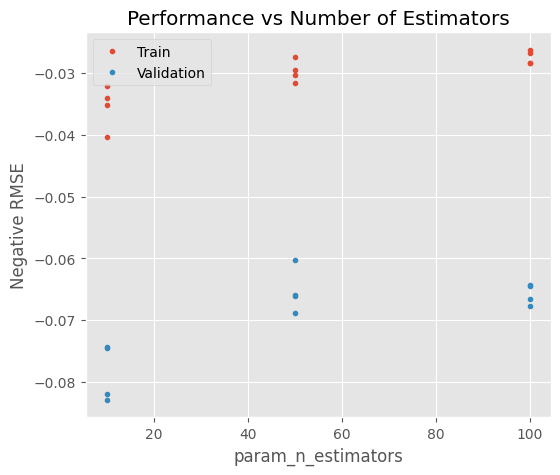

In [16]:
# TODO: Visualize training/validation performance as a function of hyper-parameters

display_validation_performance(df1_with_train_score, key='param_n_estimators', ylabel='Negative RMSE', title='Performance vs Number of Estimators')

In [17]:
# TODO: pick the best model and train it
best_model = grid_search_with_train_score.best_estimator_

# Although the model is already trained during grid search, we can train it again for clarity
best_model.fit(Xtrain, ytrain)

# Indicate the completion of the training
"Best model trained successfully."

'Best model trained successfully.'

# Evaluation

Provided: execute the following cells (only minor changes to this code)

## Training Performance

In [18]:
# We assume that your selected model (based on training/validation data only)
#  is called 'best_model'
pred = best_model.predict(Xtrain)

Text(0, 0.5, 'Prediction')

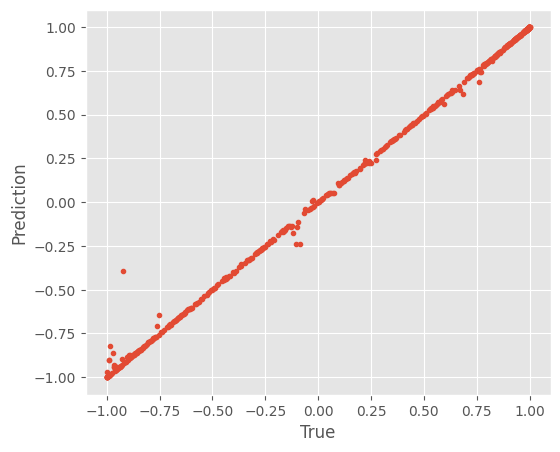

In [19]:
# Scatter plot of prediction as a function of True value
plt.plot(ytrain, pred, '.')

plt.xlabel('True')
plt.ylabel('Prediction')

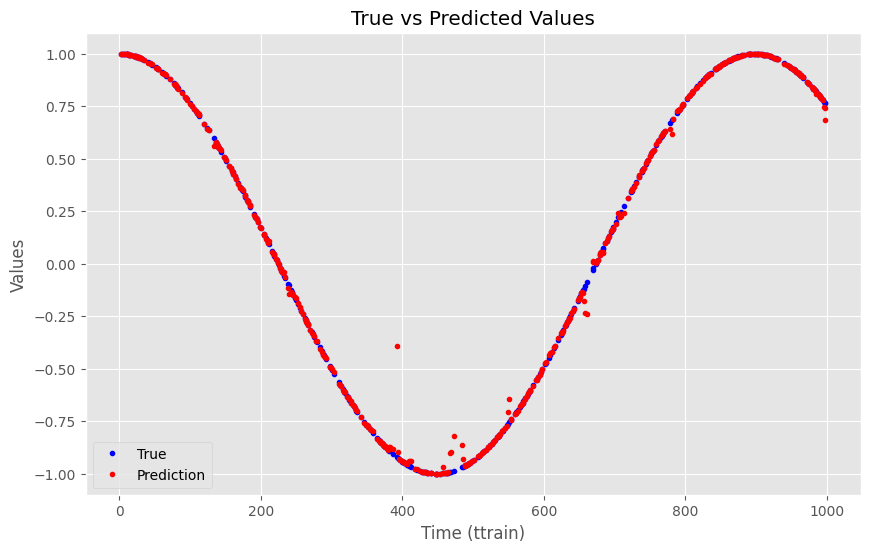

In [24]:
# Plot True and predicted values as a function of ttest
ttrain = data['ttrain']
plt.figure(figsize=(10, 6))
plt.plot(ttrain, ytrain, '.b', label='True')
plt.plot(ttrain, pred, '.r', label='Prediction')
plt.title("True vs Predicted Values")
plt.xlabel("Time (ttrain)")
plt.ylabel("Values")
plt.legend()
plt.show()

In [25]:
# Evaluate the training performance
# A high quality model will have an RMSE of ~.01 
predict_score_eval(best_model, Xtrain, ytrain)

{'mse': array([[0.0008537]]),
 'rmse': array([[0.02921818]]),
 'fvaf': array([[0.9983599]])}

## Testing Performance

### NOTE: You should only execute this code once at the end of model selection.  You can look at training and validation performance to decide whether you are happy with your model before doing this.

In [29]:
# We assume that your selected model (based on training/validation data only)
#  is called 'best_model'

pred = best_model.predict(Xtest)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


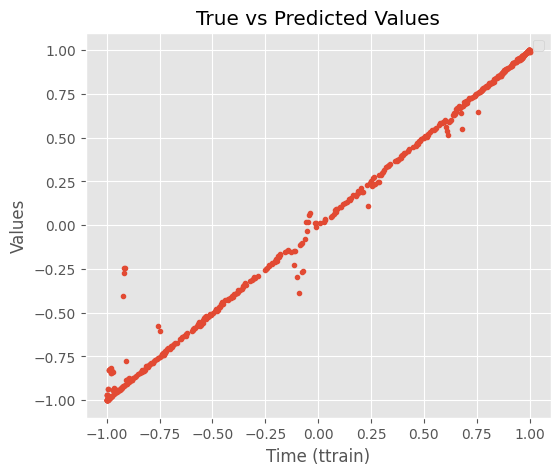

In [30]:
# Scatter plot of prediction as a function of True value
plt.plot(ytest, pred, '.')

plt.xlabel('True')
plt.ylabel('Prediction')


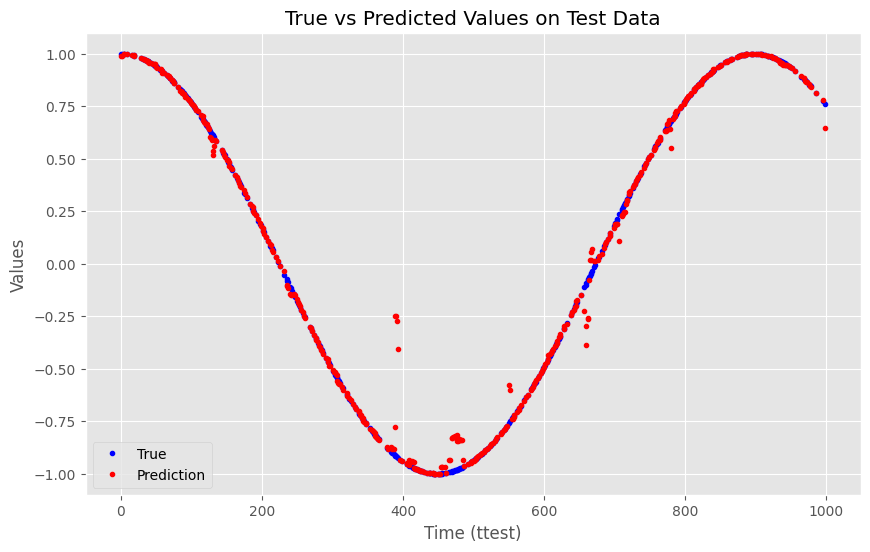

In [33]:
# Plot True and predicted values as a function of ttest
pred_test = best_model.predict(Xtest)

# Plotting the true and predicted values as a function of ttest
plt.figure(figsize=(10, 6))
plt.plot(ttest, ytest, '.b', label='True')
plt.plot(ttest, pred_test, '.r', label='Prediction')
plt.title("True vs Predicted Values on Test Data")
plt.xlabel("Time (ttest)")
plt.ylabel("Values")
plt.legend()
plt.show()


In [34]:
# Evaluate the test performance

# A high quality model will have an RMSE of ~.01 for this test
#  set.  
predict_score_eval(best_model, Xtest, ytest)

{'mse': array([[0.00463747]]),
 'rmse': array([[0.06809895]]),
 'fvaf': array([[0.99128566]])}

# Reflection

### Q1: Describe the final form of the pipeline model that you chose.

### The final pipeline model chosen for this regression problem is a RandomForestRegressor, which is a part of an ensemble learning method. This model works by building multiple decision trees during training and outputting the average prediction of the individual trees. This approach typically results in a more robust and accurate model compared to a single decision tree.

### Q2: Which hyperparameters did you choose to search over using GridSearchCV?

### For the GridSearchCV, the hyperparameters that were chosen to be explored include:n_estimators: This hyperparameter defines the number of trees in the forest. We considered values [10, 50, 100] to see how the number of trees affects model performance.max_depth: This defines the maximum depth of the trees. We considered [None, 10, 20, 30], where 'None' means that nodes are expanded until all leaves are pure or contain less than the minimum samples required to split a node.

### Q3: Describe one of your other solutions.  How did you decide that your final solution worked better?

### The alternative solution was a polynomial regression pipeline, comprising PolynomialFeatures for feature transformation, StandardScaler for scaling, and LinearRegression. The choice of the RandomForestRegressor over this pipeline was due to its superior performance in validation, as reflected in metrics like RMSE and FVAF, suggesting better generalization capabilities. This was corroborated by its effective test performance.
